Project 2: The Heun Method and Coupled Equations
===========================

Two Learning Goals
------------------

This project involves two related learning goals 1) Begin to learn a slightly improved method of integrating a differential equation (The Heun Method) and 2) learn how to turn higher order equations into a set of first order coupled equations along with a simple technique to manage the extra complexity.

The Heun Method
----------------

While Euler's Method is quite easy and accurate enough for simple problems
it is less successful when applied to more challenging situations. Depending
on the nature of the function $f(s,t)$ Euler's Method can  easily
under or overestimate the change. Getting satisfactory results using
the Euler Method can require very small time steps, making the algorithm
very slow. 

There are many ways to improve the situation and we'll see
a number of them in this course. Our first improvement is called
"The Heun Method".  The idea is to take a "fake" time step, re-evaluate
the function $f(s,t)$ there, and then average the two results
for the "real" timestep. This process is animated in the online slides, and I ecourage
you to watch those if you can. (Check under Resources -> Slides on ACE).

Starting at $x_1$ find the slope $f(s,t)$ and
extrapolate out to $x_1 + \Delta x$.

<img width="320" src="https://dl.dropboxusercontent.com/u/20562746/280/p2/heun1.png"/>

Next.. evaluate the slope at the extrapolated value of s.

<img width="320" src="https://dl.dropboxusercontent.com/u/20562746/280/p2/heun2.png"/>

Using this slope.. extrapolate *again*. Note that while the
first extrapolation underestimated the change in s, the second
overestimated. Heun's method is to use the *average* of these 
two estimates:

<img width="320" src="https://dl.dropboxusercontent.com/u/20562746/280/p2/heun3.png"/>

You can see that the average is much closer to the exact
solution than the original Euler Method result. In short
here's how it works:

Starting at $x=x_1$, take a fake Euler step,
 
first evaluate f(s,t):  

$$f_1 = f(s_1, x_1)$$
 
next jump to the next x: 

$$x_2 = x_1 + \Delta x$$
 
estimate the new value of s: 

$$s_2 = s_1 + f(s_1,x_1) \Delta x$$
  
Evaluate f(s,t) at the new position:
    
$$f_2 = f(s_2, x_2)$$
            
Extrapolate using the average of the 'f' values:
    
$$s_3 = s_1 + \frac{1}{2}(f_1 + f_2) \Delta x$$
            
Now $s_3$ is the Heun's Method result.

Let's re-work our project from last time using both the Euler and Heun methods to compare.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


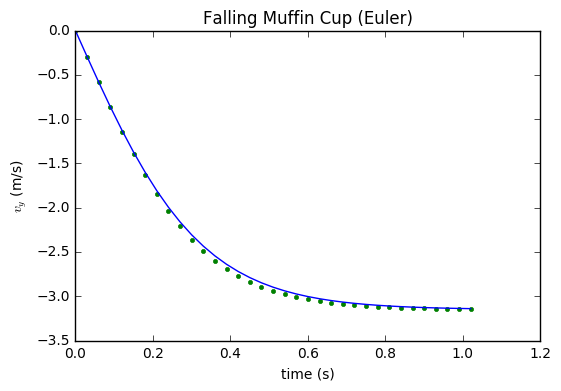

In [2]:
#
# No data this time. We'll just compare the analytical and computer
# solutions to the problem. First let's do the Euler Method:
#

m = 0.0038  # kg (mass of cup plus 6 paper clips. See proj. 1)
g = 9.8     # m/s^2, gravitational field strength at Earth's surface
b = 0.00375 # effective drag coefficient, measured experimentally

s = 0.0     # s is the 'state', in this case, it's just the velocity.
dt = 0.03   # pick a reasonable time step
t = 0.0     # start at t=0.0
tf = 1.0    # stop in 10 sec

def derivs_drag(s,t):
    """
    The derivs_drag function computes the time derivative of the "state"
    for this particular problem. In this case the "state" is just the velocity
    of an object falling with drag.
    """
    dsdt = b*s**2/m - g
    return dsdt

def EulerStep(s, t, derivs, dt):
    """
    EulerStep is a generic implimentation of the Euler Algorithm.
    Notice that it knows *nothing* about the state, nor the physics
    of the problem (which is handled by the 'derivs' function
    that is passed in by the programmer).
    """
    return s + derivs(s,t)*dt

v0=sqrt(m*g/b)
tau=v0/(2*g)

def VAnalytical(t):
    return v0*(1-exp(t/tau))/(1+exp(t/tau))

tlist = [t]
slist = [s]

while t <= tf:
    s = EulerStep(s, dt, derivs_drag, dt)
    t += dt
    tlist.append(t)
    slist.append(s)
    
xlabel("time (s)")
ylabel("$v_y$ (m/s)")
title("Falling Muffin Cup (Euler)")
v_euler = array(slist)
v_analytical = VAnalytical(array(tlist))
plot(tlist,v_euler,'g.',tlist,v_analytical,'b-')

In [4]:
#
# Let's get a numerical measure of the "error" per time step
#

rms_diff_euler = sqrt((v_euler-v_analytical)**2).sum()/len(tlist)
print ("RMS difference per time step=", rms_diff_euler)

RMS difference per time step= 0.0267378365429


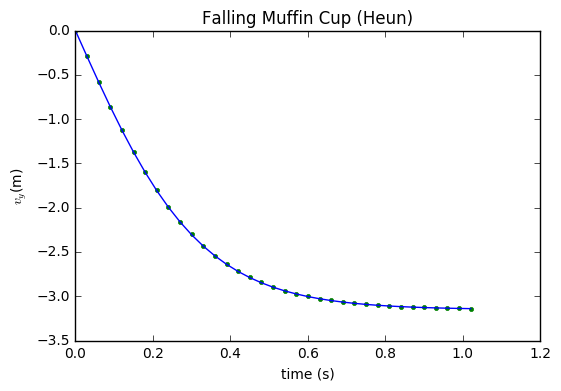

In [5]:
#
# No data this time. We'll just compare the analytical and computer
# solutions to the problem.
#

m = 0.0038  # kg (mass of cup plus 6 paper clips. See proj. 1)
g = 9.8     # m/s^2, gravitational field strength at Earth's surface
b = 0.00375 # effective drag coefficient, measured experimentally

s = 0.0     # s is the 'state', in this case, it's just the velocity.
dt = 0.03   # pick a reasonable time step
t = 0.0     # start at t=0.0
tf = 1.0    # stop in 10 sec

def derivs_drag(s,t):
    """
    The derivs_drag function computes the time derivative of the "state"
    for this particular problem. In this case the "state" is just the velocity
    of an object falling with drag.
    """
    dsdt = b*s**2/m - g
    return dsdt

def HeunStep(s, t, derivs, dt):
    """
    HeunStep is a generic implimentation of the Heun Method.
    Notice that it knows *nothing* about the state, nor the physics
    of the problem (which is handled by the 'derivs' function
    that is passed in by the programmer).
    """
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt

v0=sqrt(m*g/b)
tau=v0/(2*g)

def VAnalytical(t):
    return v0*(1-exp(t/tau))/(1+exp(t/tau))

tlist = [t]
slist = [s]

while t <= tf:
    s = HeunStep(s, t, derivs_drag, dt)
    t += dt
    tlist.append(t)
    slist.append(s)
    
xlabel("time (s)")
ylabel("$v_y$(m)")
title("Falling Muffin Cup (Heun)")
v_heun = array(slist)
v_analytical = VAnalytical(array(tlist))
plot(tlist,v_heun,'g.',tlist,v_analytical,'b-')

In [6]:
#
# Let's get a numerical measure of the "error" per time step
#

rms_diff_heun = sqrt((v_heun-v_analytical)**2).sum()/len(tlist)
print ("RMS difference per time step=", rms_diff_heun)

RMS difference per time step= 0.00190992048817


Wow! That 0.2% rms error for Euler compared to 2.6% for the Euler Method, over 10x better.

Heun’s method is considered a 2nd order method. That means that
the size of the error goes like $dt^2$. Euler’s Method, in
contrast, is 1st order. Let’s graph the error using Heun’s Method and
Euler’S Method as we change the time step size for an example problem
(like the simple harmonic oscillator, which we’ll study next!).
 
Note that halving the time step using  Euler’s Method reduces the
error in proportion (i.e., by half). However, reducing the time step
using Heun’s method reduces the error by a factor of 4, so you get 4
times the accuracy by doubling the number of steps. Of course, each
step now requires more work as well, so it’s not all for free.

Let's quantify that even more. The following block of code computes the velocity as a function of time for a number of different time steps using both the Euler and Heun methods comparing the output with the analytical solution along the way. Notice that the log of the rms error per time step $\log(\sigma)$ is linear in the log of the time step with a slope of 1 (Euler) or 2 (Heun). We'll discuss what that means exactly in class, but you should think about it yourself as well. You don't need to understand this code in detail, but you should understand what it's doing at a high level (not the nuts and bolts, but the basic idea).

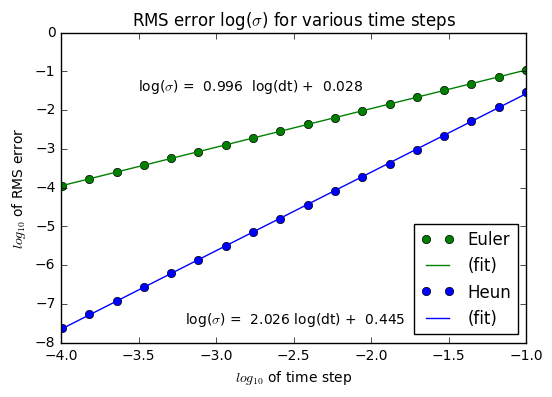

In [7]:
"""
Compare Euler and Heun methods with different time steps
"""
#
# No data this time. We'll just compare the analytical and computer
# solutions to the problem.
#

m = 0.0038  # kg (mass of cup plus 6 paper clips. See proj. 1)
g = 9.8     # m/s^2, gravitational field strength at Earth's surface
b = 0.00375 # effective drag coefficient, measured experimentally

s = 0.0     # s is the 'state', in this case, it's just the velocity.
dt = 0.03   # pick a reasonable time step
t = 0.0     # start at t=0.0
tf = 1.0    # stop in 10 sec

def derivs_drag(s,t):
    """
    The derivs_drag function computes the time derivative of the "state"
    for this particular problem. In this case the "state" is just the velocity
    of an object falling with drag.
    """
    dsdt = b*s**2/m - g
    return dsdt

def EulerStep(s, t, derivs, dt):
    """
    EulerStep is a generic implimentation of the Euler Algorithm.
    Notice that it knows *nothing* about the state, nor the physics
    of the problem (which is handled by the 'derivs' function
    that is passed in by the programmer).
    """
    return s + derivs(s,t)*dt

def HeunStep(s, t, derivs, dt):
    """
    HeunStep is a generic implimentation of the Heun Method.
    Notice that it knows *nothing* about the state, nor the physics
    of the problem (which is handled by the 'derivs' function
    that is passed in by the programmer).
    """
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt

v0=sqrt(m*g/b)
tau=v0/(2*g)

def VAnalytical(t):
    return v0*(1-exp(t/tau))/(1+exp(t/tau))

"""
OK.. ready to run!
"""
dt = 0.1
dtlist = []
err_heunlist=[]
err_eulerlist=[]

while dt > 1e-4:
    t = 0.0

    s = 0.0
    s_euler = 0.0
    s_exact = VAnalytical(t)
    
    vlst = [s]
    tlst = [t]
    
    velist = [s_exact]
    veulerlst = [s_euler]
    
    while t < tf:
    
        # do a Heun Step and an Euler Step
    
        s = HeunStep(s, t, derivs_drag, dt)
        s_euler = EulerStep(s_euler, t, derivs_drag, dt)
        t += dt
        s_exact = VAnalytical(t)
        
        vlst.append(s)    
        velist.append(s_exact)
        veulerlst.append(s_euler)
        tlst.append(t)
    
    #
    # now compute the rms error for Heun and Euler methods
    #
    
    diff_heun = array(vlst)-array(velist)
    diff_euler = array(veulerlst)-array(velist)
    
    heunErr = sqrt((diff_heun**2).sum()/len(tlst))
    eulerErr = sqrt((diff_euler**2).sum()/len(tlst))
    err_heunlist.append(heunErr)
    err_eulerlist.append(eulerErr)
    dtlist.append(dt)
    dt = dt/1.5

coefs_euler = polyfit(log10(dtlist), log10(err_eulerlist), 1)
coefs_heun = polyfit(log10(dtlist), log10(err_heunlist), 1)

plot(log10(dtlist), log10(err_eulerlist), "go", log10(dtlist), coefs_euler[1] + log10(dtlist)*coefs_euler[0], "g")
plot(log10(dtlist), log10(err_heunlist), "bo", log10(dtlist), coefs_heun[1] + log10(dtlist)*coefs_heun[0], "b")
xlabel("$log_{10}$ of time step")
ylabel("$log_{10}$ of RMS error")
title("RMS error log($\sigma$) for various time steps")
legend(['Euler', '(fit)','Heun', '(fit)'], loc=4)

text(-3.2, -7.5, "log($\sigma$) = %6.3f log(dt) + %6.3f" % (coefs_heun[0], coefs_heun[1]))
text(-3.5, -1.5, "log($\sigma$) = %6.3f  log(dt) + %6.3f" % (coefs_euler[0], coefs_euler[1]))

Coupled Equations
=================

Suppose in addition to the velocity of the muffin cup, we also want to track the position. How could we do it? The first thing to notice is that the position and the velocity are related by yet another first order differential equation:

$$\frac{dy}{dt} = v$$

So that we can introduce the position $y$ by adding a second first order equation to our system.

Let's re-work the Heun method example from above to do this. Now we'll define the *state* as not just the velocity, but include both the velocity *and* the position.

`s = array([y, v])`

The primary changes then relate to the `derivs_drag` method and how we set initial state and extract values from the state to make graphs and comparisons. Examine the following code. Notice how the state is now an array that contains the $y$ and $v_y$ values at each time. Notice also that the `HeunStep` function is identical to the one used earlier! This means that we can use the same function to handle any number of coupled first order equations. Neat!

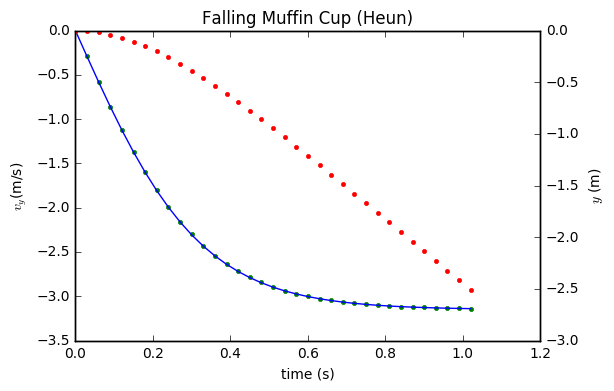

In [8]:
#
# No data this time. We'll just compare the analytical and computer
# solutions to the problem.
#

m = 0.0038  # kg (mass of cup plus 6 paper clips. See proj. 1)
g = 9.8     # m/s^2, gravitational field strength at Earth's surface
b = 0.00375 # effective drag coefficient, measured experimentally

vi = 0.0    # intial velocity
yi = 0.0    # initial height

s = array([yi,vi])  # <-- now 'state' is position *and* velocity

dt = 0.03   # pick a reasonable time step
t = 0.0     # start at t=0.0
tf = 1.0    # stop in 10 sec

def derivs_drag(s,t):
    """
    The derivs_drag function computes the time derivative of the "state"
    for this particular problem. Now the "state" is both the position
    *and* the velocity of the falling muffin tin.
    """
    y=s[0]  # <- y is the first element of the state vector
    v=s[1]  # <- v is the second element of the state vector

    dvdt = b*v**2/m - g   # in this problem dv/dt = a doesn't depend on y
    dydt = v
    
    return array([dydt, dvdt])

def HeunStep(s, t, derivs, dt):
    """
    HeunStep is a generic implimentation of the Heun Method.
    Notice that it knows *nothing* about the state, nor the physics
    of the problem (which is handled by the 'derivs' function
    that is passed in by the programmer). Note that this function has *not*
    changed at all.
    """
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt

v0=sqrt(m*g/b)  # terminal velocity
tau=v0/(2*g)    # time constant

def VAnalytical(t):
    return v0*(1-exp(t/tau))/(1+exp(t/tau))

tlist = [t]
ylist = [yi]
vlist = [vi]

while t <= tf:
    s = HeunStep(s, t, derivs_drag, dt)
    t += dt
    tlist.append(t)
    ylist.append(s[0])  # append the y value
    vlist.append(s[1])  # append the v value

fig, ax1 = subplots()
ax1.set_xlabel("time (s)")
ax1.set_ylabel("$v_y$(m/s)")
ax1.set_title("Falling Muffin Cup (Heun)")
v_heun = array(vlist)
v_analytical = VAnalytical(array(tlist))
ax1.plot(tlist,v_heun,'g.',tlist,v_analytical,'b-')

ax2 = ax1.twinx()
ax2.set_ylabel("$y$ (m)")
ax2.plot(tlist,ylist,'r.')

Project 2 (option 1): Spaceshot to Proxima Centauri
============================

Now we're going to combine all this into our next project. Proxima Centauri is about 4.24 light-years away. It is the nearest start to our Sun. It is dreamed that some day humans will develop the technology needed to send astronauts to visit Proxima Centauri. Let's assume we have that technology already and consider modeling how that might work. Suppose you have an advanced propulsion system capable of producing incredible quantities of thrust with very little fuel. Let's design the mission so that humans can arrive at Proxima Centauri in five years or less (according to their own biological clocks).

Use the **Heun** **Method** to compute the position and velocity of the space-craft as it leaves our solar system and heads to Proxima Centauri. You should use a `state` array like the one used in the last Heun Method example. Ignore gravitational effects from our Sun and/or Proxima Centauri. Just assume that you have control of the thrust which can be directed toward or away from the Sun and turned on and off. You can make the thrust whatever you like, but understand that the human body will not survive an acceleration of much more than 4 of 5 times $g$.

Think about how you can do this and what limitations you might encounter. We'll discus this more in class. This project is a good option if you've had Modern Physics (PHYS 250) *or* if you want to learn about the effects of special relativity in a concrete situation.

Project 2 (option 2): Baseball with quadratic drag
============================

Suppose you're modeling a baseball in flight, but including the effect of air drag. Assume a baseball is launched with an initial speed of 80 m/s in a direction 35 degrees above the horizontal.  You may assume that the magnitude of the drag force is given by:

$$ f_d = \frac{1}{2} C_d A \rho v^2 $$

Where $C_d$ is the drag coefficient (around 1), $A$ is the cross sectional area of the ball, $\rho$ is the density of the air and $v$ is the speed of the ball (magnitude of velocity).

Use Heun's method to find the trajectory of the ball and, in particular, the maximum altitude and range (distance from the batter where the ball reaches the ground). Remember, position and velocity will both be two component vectors so the `state` vector will have four components over all. This project is a good option if you don't want to mess with relativity.

Project 2 (option 3): You come up with your own problem
==============================

It's OK with me, if you don't like either of these two options, to come up with your own. However it must be at least a second order system (have a state vector with two components) and you must use the Heun method to solve it.

